In [10]:
using HDF5, StatsBase, Statistics,PyPlot
push!(LOAD_PATH, "../Preprocesamiento/")
using ArraySetTools, OrdenaSets

In [44]:
# El de franco que tiene bonito los canales detectados.
arxname="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

"/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"

In [12]:
#arxname="/home/karel/BRWFiles/Isabel2019/Cacho_06_control_02_preproc.h5"

"/home/karel/BRWFiles/Isabel2019/Cacho_06_control_02_preproc.h5"

In [45]:
arx=h5open(arxname)
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [47]:
canales=read(arx["CanalesBuenos"])
#lfp=read(arx["dset"]);
lfp=read(arx["LFPSaturados"]);
#freq=read(arx["SamplingRate"])/1000
freq=read(arx["freq"])

dd=size(lfp)
if length(dd)==2
    nmax=dd[2]
    lfp=reshape(lfp, 64,64,nmax)
end
nmax=size(lfp,3)
typeof(lfp)

Array{Float32,3}

In [48]:
fac=read(arx["Factor"])
off=read(arx["Offset"])

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5O.c line 120 in H5Oopen(): unable to open object
    major: Object header
    minor: Can't open object
  #001: H5Oint.c line 596 in H5O__open_name(): unable to open object
    major: Object header
    minor: Can't open object
  #002: H5Oint.c line 551 in H5O_open_name(): object not found
    major: Object header
    minor: Object not found
  #003: H5Gloc.c line 422 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #004: H5Gtraverse.c line 851 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #005: H5Gtraverse.c line 627 in H5G__traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #006: H5Gloc.c line 378 in H5G__loc_find_cb(): object 'Factor' doesn't exist
    major: Symbol table
    minor: Object not found


ErrorException: Error opening object //Factor

In [16]:
# fac, off, freq

(2.01416015625, -4125.0, 17.85550205219098)

In [49]:
sqrt(nmax)

44.721359549995796

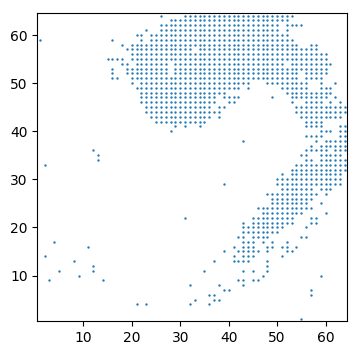

PyObject <matplotlib.collections.PathCollection object at 0x7f40c91d8400>

In [51]:
ff=figure(figsize=(4,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
# Isabel Nuevos
#scatter(canales[:,3], canales[:,2], s=0.5)
#Franco Viejos
scatter(canales[:,2], canales[:,1], s=0.5)

In [53]:
yxref=[39,40]
# okey menso a barreconjunto le tienes que pasar solo las columnas con coordenadas!!!
orderchans=barreconjuntoyordena(canales[:,1:2], yxref);

alfamin = 0.015623728620476831


In [54]:
v=orderchans[:,2].==40
orderchans[v,:]

19×3 Array{Int64,2}:
 51  40   408
 50  40   409
 49  40   410
 47  40   411
 46  40   412
 64  40   413
 63  40   414
 62  40   415
 61  40   416
 60  40   417
 59  40   418
 58  40   419
 57  40   420
 56  40   421
 55  40   422
 54  40   423
 53  40   424
 52  40   425
  7  40  1019

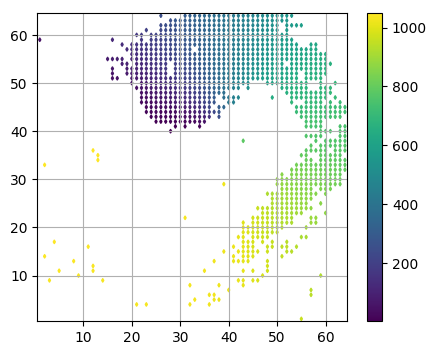

In [55]:
ff=figure(figsize=(5,4))
xlim(0.5,64.5)
ylim(0.5,64.5)
#scatter(canales[:,2], canales[:,1], s=0.5)
scatter(orderchans[:,2], orderchans[:,1], marker="d",s=3, cmap="viridis", c=orderchans[:,3])
colorbar()
grid()

In [56]:
ejemplos=([58,30], [56,41], [54,36],[14,40])

([58, 30], [56, 41], [54, 36], [14, 40])

In [57]:
cbrt(nmax)

12.599210498948732

In [58]:
sqrt(nmax)

44.721359549995796

In [65]:
function freediaconisbin(datos)
    # Freedman and Diaconis
    n=length(datos)
    m=iqr(datos)
    result=2*m/cbrt(n)
    return result
end

function scottbin(datos)
    n=length(datos)
    m=std(datos)
    result=3.49*m/cbrt(n)
end

function sqrbin(datos)
    n=length(datos)
    sq=sqrt(n)
    (mir,mar)=extrema(datos)
    result=(mar-mir)/sq
end

function mejorbin(datos; deltax=1)
    # estas asumiendo que los datos se ven bastante gaussianos!
    # y que estan discretizados en pasos deltax
    sig=std(datos)/13
    (fd, sb, sq)=(freediaconisbin(datos), scottbin(datos), sqrbin(datos))
    bines=[fd, sb, sq, sig, deltax]
    result=minimum(bines[bines.>=deltax])
    if result==deltax 
        println("eeaa es delta x para variar")
    end
    return result
end

mejorbin (generic function with 1 method)

In [69]:
verbines=zeros(64,64)

for j=1:64,k=1:64
    lfpex=vec(lfp[j,k,:])
    verbines[j,k]=mejorbin(lfpex, deltax=4)
end

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para variar
eeaa es delta x para

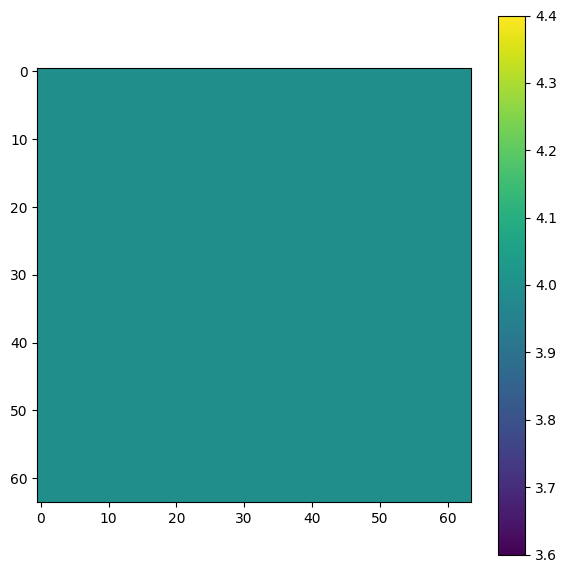

PyObject <matplotlib.colorbar.Colorbar object at 0x7f40c8b99f98>

In [70]:
figure(figsize=(7,7))
imshow(verbines)
colorbar()

In [71]:
verbines==ones(64,64)

false

In [39]:
function sacaentropiafd(datos::Array)
    binsize=freediaconis(datos)
    (vmin,vmax)=extrema(datos)
    normalizador=size(datos,1)
    if(binsize != 0 )
        rango=vmin:binsize:vmax
        histodo=fit(Histogram,datos,rango)
        pdf=histodo.weights./normalizador
        result=entropy(pdf)
    else
        result=0
    end
    return result
end

sacaentropiafd (generic function with 1 method)

In [21]:
function histofreediaconis(arreglos::Array...)
    ll=length(arreglos)
    binsizes=zeros(Real,ll)
    rangos=Array{StepRangeLen}(undef, ll)     
       
    for j in 1:ll
        binsizes[j]=freediaconis(arreglos[j])
    end
    
    if any(x->x==0, binsizes)
        error(" una de tus cajas mide cero, algo esta mal")
    else
        for j in 1:ll
            (vi, vf)=extrema(arreglos[j])
            rangos[j]=vi:binsizes[j]:(vf+binsizes[j])
        end
    end
    histodo=fit(Histogram, arreglos, (rangos...,))
    return histodo
    #return rangos
end    



histofreediaconis (generic function with 1 method)

In [24]:
caralho=Dict{Array, Any}()
for q in ejemplos
    caralho[q]=histofreediaconis(lfp[q[1], q[2], :])
end

1 Base.TwicePrecision{Float64}(0.4607807661920545, 0.0)
159.8500616351135 17.0 [58, 30] 2051.0 0.4607807661920545
1 Base.TwicePrecision{Float64}(0.3523617623821593, 0.0)
13304.115182497977 13.0 [56, 41] 2049.0 0.3523617623821593
1 Base.TwicePrecision{Float64}(0.4065712642871069, 0.0)
11412.924181035947 15.0 [54, 36] 2049.0 0.4065712642871069
1

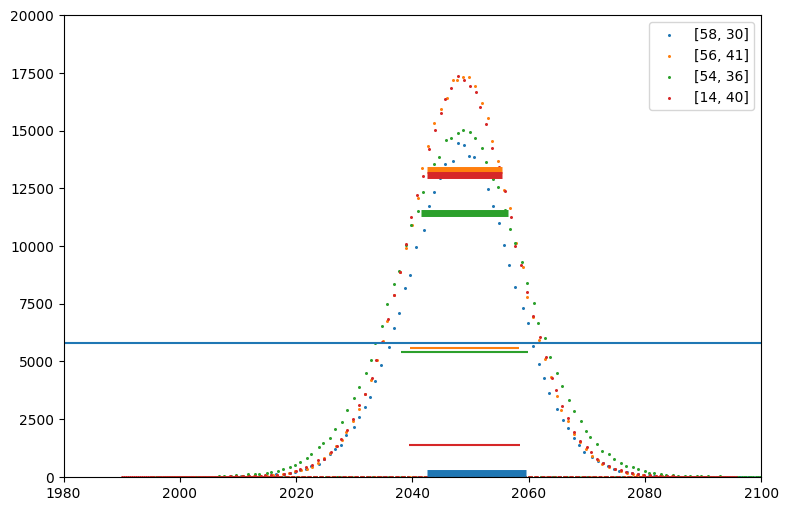

 Base.TwicePrecision{Float64}(0.3523617623821593, 0.0)
13065.98283909582 13.0 [14, 40] 2049.0 0.3523617623821593


PyObject <matplotlib.legend.Legend object at 0x7f63e9d39048>

In [100]:
figure(figsize=(9,6))
xlim(1980,2100)
ylim(-20,2.0*10^4)
for q in ejemplos
     lfpex=vec(lfp[q[1], q[2],:])
      sig=std(lfpex)
    inter=iqr(lfpex)
    mm=median(lfpex)
    
    ff=freediaconis(lfpex)
    
    edg=caralho[q].edges[1][1:end-1]
    ww=caralho[q].weights
    aa=scatter(edg,ww, label="$q", s=1.4)
    l=caralho[q].edges[1].step
    println(1, " ", l)
    
    altura=exp(-0.25)/(sig*sqrt(2*pi))
    
    colore=aa.get_facecolors()
    ylin=100*q[1]
    hlines(ylin,mm-sig, mm+sig, color=colore)
    
    ylin2=altura*nmax
    hlines(ylin2, mm-inter/2, mm+inter/2, color=colore, lw=5)
    println(ylin2, " ", inter, " ", q, " ", mm, " ", ff)
end
legend()

In [107]:
for q in ejemplos
    lfpex=vec(lfp[q[1], q[2],:])
    sig=std(lfpex)
    inter=iqr(lfpex)
    mm=median(lfpex)  
    ff=freediaconisbin(lfpex)
    ss=scottbin(lfpex)
    sq=sqrbin(lfpex)
    println(q, " ", sig, " ", inter, " ", mm, " ", ff ,  " ", ss, " ", sq)
end

[58, 30] 780.8675233622242 17.0 2051.0 0.4607807661920545 36.93330845957613 3.3052717032174175
[56, 41] 9.382188896148257 13.0 2049.0 0.3523617623821593 0.44375680401644035 0.14830336043075762
[54, 36] 10.936874700851641 15.0 2049.0 0.4065712642871069 0.5172900073639164 0.18143496222911837
[14, 40] 9.553182739902311 13.0 2049.0 0.3523617623821593 0.4518444350000733 0.1672357043155352


[58, 30] 780.8675233622242 17.0
[56, 41] 9.382188896148257 13.0
[54, 36] 10.936874700851641 15.0


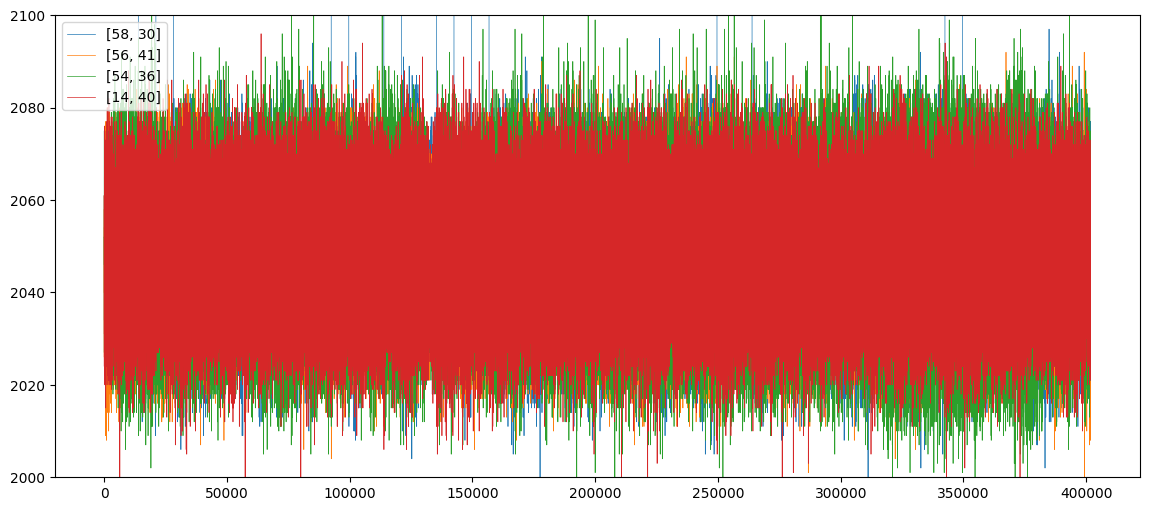

[14, 40] 9.553182739902311 13.0


PyObject <matplotlib.legend.Legend object at 0x7f63eb2da320>

In [54]:
figure(figsize=(14,6))
ylim(2000,2100)
for q in ejemplos
    lfpex=vec(lfp[q[1], q[2],:])
    rangg=collect(1:nmax)
    plot(rangg, lfpex, lw=0.5, label="$q")
    sig=std(lfpex)
    inter=iqr(lfpex)
    println(q, " ", sig, " ", inter)
end
legend()

In [15]:
uno=sum(rr3.weights, dims=[1,3])
otro=rryy.weights
vec(uno)==otro
(typeof(uno), typeof(otro))

(Array{Int64,3}, Array{Int64,1})

In [16]:
fururu=[rrr.edges[2][1], rrr.edges[2][end], rrr.edges[1][1], rrr.edges[1][end]]
f9=[0,1,0,1]
imshow(rrr.weights./sum(rrr.weights), extent=fururu, origin="lower", interpolation="nearest")
colorbar()
#scatter(yy,xx, c="red", s=1)

UndefVarError: UndefVarError: rrr not defined

In [17]:
function transferentropyfd(yyfuture::Array, yypast::Array, xxpast::Array)
    hfd=histofreediaconis(yyfuture,yypast,xxpast)
    pesos=hfd.weights./sum(hfd.weights)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=sum(pesos, dims=[1,3])
    pypastxpast=sum(pesos, dims=1)
    pyfutpypast=sum(pesos, dims=3)

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    
end


transferentropyfd (generic function with 1 method)

In [18]:
tau=round(Int, 5*freq)
xx=lfp[56,30,:]
yy=lfp[56,40,:]
xf=xx[tau:end]
xp=xx[1:end-tau+1]
yp=yy[1:end-tau+1]
transferentropyfd(xf,xp,yp)

1.2312138905946999

In [19]:
rrr=histofreediaconis(xx,yy)
rx=sum(rrr.weights, dims=2)
ry=sum(rrr.weights, dims=1)

1×86 Array{Int64,2}:
 2  0  1  2  1  1  1  1  1  4  1  3  2  …  0  3  2  1  0  1  0  1  1  1  0  2

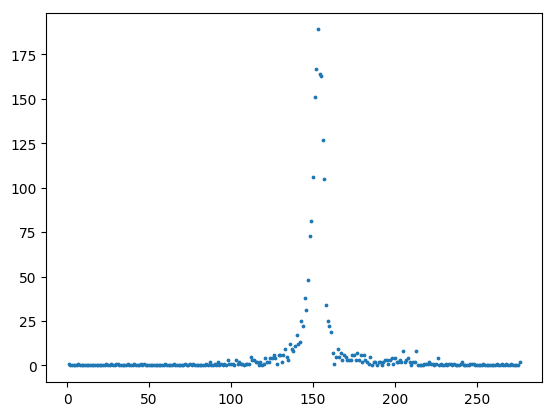

PyObject <matplotlib.collections.PathCollection object at 0x7fd578518c88>

In [20]:
scatter(1:length(rx),vec(rx), s=3)

In [68]:
function histocountmap(xxs::Array)
    dicto=countmap(xxs)
    ll=length(dicto)
    bla=zeros(ll,2)
    j=1
    for k in sort(collect(keys(dicto)))
        bla[j,1]=k
        bla[j,2]=dicto[k]
        j+=1
    end
    return bla
end

function histocountmap(xxss::Array...)
    valores=collect(zip(xxss...))
    dicto=countmap(valores)
    ll=length(dicto)
    tantas=length(xxss)
    bla=zeros(ll, tantas+1)
    j=1
    for k in sort(collect(keys(dicto)))
        for l in 1:tantas
            bla[j,l]=k[l]
        end
        bla[j,tantas+1]=dicto[k]
        j+=1
    end
    return bla
end

LoadError: syntax: incomplete: "function" at none:1 requires end

In [72]:
rangg=250:1500
xxpas=xx[rangg]
yypas=yy[rangg]
yyfut=yy[rangg.+28];

In [76]:
haha=histocountmap(yyfut,yypas,xxpas)
countmap(haha[:,end])

Dict{Float64,Int64} with 2 entries:
  2.0 => 4
  1.0 => 1243

In [22]:
function entrocountmap(xxs::Array)
    cuentas=histocountmap(xxs)
    pdfval=cuentas[:,2]./sum(cuentas[:,2])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end

function entrocountmap(xxss::Array...)
    cuentas=histocountmap(xxss...)
    #ligeramente diferente ¿sera generalizable?
    pdfval=cuentas[:,end]./sum(cuentas[:,end])
    suma=0
    for j in pdfval
        suma+=j*log(j)
    end
    return (-suma)
end


entrocountmap (generic function with 2 methods)

In [ ]:
function transferentropycm(yyfuture, yypast, xxpast)
    hcm=histocountmap(yyfuture,yypast,xxpast)
    pesos=hcm[:,end]
    pesos=pesos./sum(pesos)
    #checa que conserva su "dimensionalidad" en los indices
    pypast=histocountmap(yypast)
    pypastxpast=histocountmap(yypast,xxpast)
    pyfutpypast=histocountmap(yyfuture,yypast)
    
    

    (KK,LL,MM)=size(pesos)
    
    sumatum=0
    
    for k=1:KK, l=1:LL, m=1:MM
        aux1=pesos[k,l,m]*pypast[1,l,1]
        aux2=pypastxpast[1,l,m]*pyfutpypast[k,l,1]
        if aux1 !=0  && aux2 !=0
            aux3=log(aux1/aux2)
            sumatum+=pesos[k,l,m]*aux3
        end
    end
    
    return sumatum
    


end

In [23]:
fu=histocountmap(xx,yy)
bar=entrocountmap(xx,yy)

7.258144577604487

In [25]:
fufu=fu[fu[:,3].>2,:]
typeof(fufu)

Array{Float64,2}

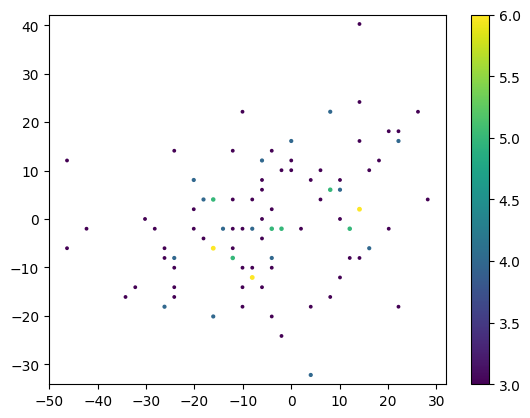

(-50.053800503667674, 31.926359097417667, -35.85500884745723, 43.91128698707785)

In [26]:
eqs=fufu[:,1]
yes=fufu[:,2]
siz=fufu[:,3]
scatter(eqs,yes, s=siz, c=siz)
colorbar()
axis("equal")

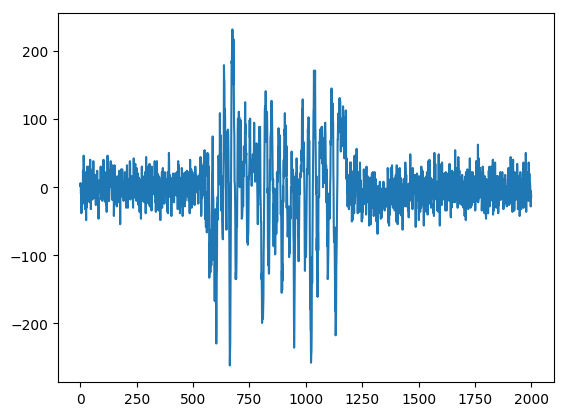

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5767bdf60>

In [27]:
plot(yy)

In [28]:
hetasfd=zeros(64,64)
hetascm=zeros(64,64)
for j=1:64, k=1:64
    ejemplo=lfp[j,k,:]
    hetasfd[j,k]=sacaentropiafd(ejemplo)
    hetascm[j,k]=entrocountmap(ejemplo)
end


In [29]:
dh=hetasfd-hetascm;
#map!(x->round(x ;digits=3), dh)

64×64 Array{Float64,2}:
 -0.00430033  -0.828288  -0.721642  …   0.0        0.0        0.0     
 -0.645778    -0.949897  -0.725919      0.0        0.0        0.0     
 -0.655579    -0.727874  -0.656125      0.0        0.0        0.0     
 -0.873623    -0.722449  -0.883149      0.0        0.0        0.0     
 -0.809698    -0.879922  -0.726231      0.0        0.0        0.0     
 -0.736013    -0.870958  -0.80382   …   0.0        0.0        0.0     
 -0.801438    -0.650344  -0.86598       0.0        0.0        0.0     
 -0.725109    -0.795596  -0.802805      0.0        0.0        0.0     
 -0.868443    -0.815723  -0.648623      0.0        0.0        0.0     
 -0.742314    -0.729287  -0.814583      0.0        0.0        0.0     
 -0.654961    -0.798873  -0.742495  …   0.0        0.0        0.0     
 -0.593115    -0.645372   0.0           0.0        0.0        0.0     
 -0.7153      -0.884071  -0.793444      0.0        0.0        0.0     
  ⋮                                 ⋱                

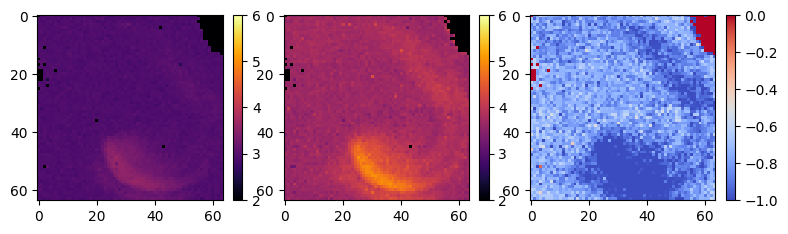

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd576608f28>

In [30]:
fig, (uno, dos, tres)=subplots(1,3, figsize=(9,4))
bmin=2
bmax=6
fafa=uno.imshow(hetasfd, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fafa, ax=uno, fraction=0.045)
fufu=dos.imshow(hetascm, origin="upper", cmap="inferno", vmin=bmin, vmax=bmax)
colorbar(fufu, ax=dos, fraction=0.045)
fefe=tres.imshow(dh, origin="upper", cmap="coolwarm", vmin=-1, vmax=0)
colorbar(fefe, ax=tres, fraction=0.045)


In [31]:
mean(hetascm)

3.7399459847198226

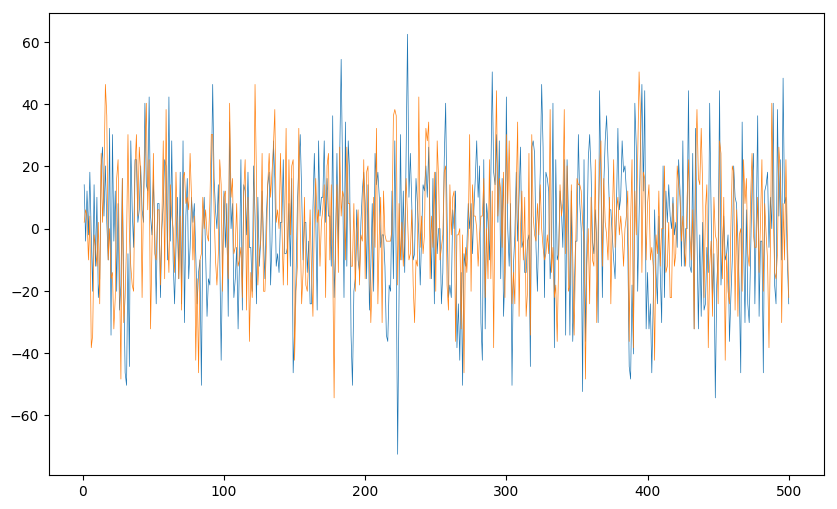

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd57680e2e8>

In [32]:
f=figure(figsize=(10,6))
rang=1:5*10^2
plot(rang,xx[rang], lw=0.5)
plot(rang,yy[rang], lw=0.5)

In [33]:
vallfpdisc=zeros(64,64)
hfdiacounts=zeros(64,64)
iqrs=zeros(64,64)
for j=1:64, k=1:64
    haux=0
    try
        haux=histofreediaconis(lfp[j,k,:])
          hfdiacounts[j,k]=length(haux.edges[1])
    catch e
    end
    iqrs[j,k]=iqr(lfp[j,k,:])
  
    vallfpdisc[j,k]=length(countmap(lfp[j,k,:]))
end

In [34]:
iqr(vec(iqrs))
mean(vec(iqrs))
mode(vec(iqrs))


26.18408203125

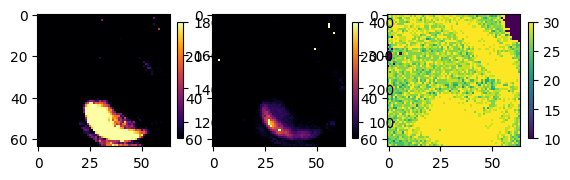

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd5764e3b38>

In [35]:
figure(figsize=(12,8))
fig, (uno, dos,tres)=subplots(1,3)
fafa=uno.imshow(vallfpdisc, origin="upper", vmin=110, vmax=180, cmap="inferno")
colorbar(fafa, ax=uno, fraction=0.04)
fufu=dos.imshow(hfdiacounts, origin="upper", vmin=50, vmax=400, cmap="inferno")
colorbar(fufu, ax=dos, fraction=0.04)
fefe=tres.imshow(iqrs, vmin=10,vmax=30)
colorbar(fefe, ax=tres, fraction=0.04)


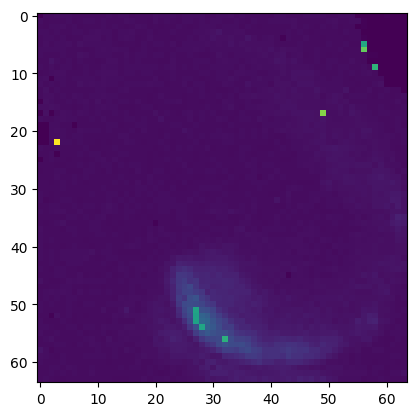

PyObject <matplotlib.image.AxesImage object at 0x7fd57640dcc0>

In [36]:
imshow(hfdiacounts)

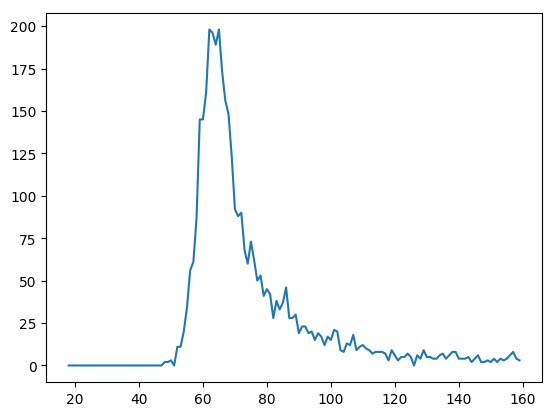

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd5763f4320>

In [37]:
vv=vec(vallfpdisc)
ll=length(countmap(vv))
jhh=fit(Histogram, vv, 18:160)
ta=jhh.weights
tu=jhh.edges[1]
size(collect(tu[1:end-1])), size(ta)
plot(tu[1:end-1], ta)

In [38]:
typeof(vv)

Array{Float64,1}

In [55]:
function sacaentropiafd(datosX::Array, datosY::Array)
    # ambos arrays deben ser igual de largos ???
    binsizeX=freediaconis(datosX)
    binsizeY=freediaconis(datosY)
    if (binsizeX==0 || binsizeY==0)
        error(" ¡Esto que, no tiene variacion en los datos!")
    else
        (viX,vfX)=extrema(datosX)
        (viY,vfY)=extrema(datosY)
        rangoX=viX:binsizeX:vfX
        rangoY=viY:binsizeY:vfY
        
        histodo=fit(Histogram, (datosX, datosY), (rangoX, rangoY))
        
        pdf=histodo.weights
        pdf=pdf./sum(pdf)
        result=entropy(pdf)
        return result
        #return (result, histodo)
    end

end

sacaentropiafd (generic function with 2 methods)

In [56]:
function infomutua(datosX::Array, datosY::Array)
    hetaX=sacaentropiafd(datosX)
    hetaY=sacaentropiafd(datosY)
    hetaXY=sacaentropiafd(datosX,datosY)
    result=hetaX+hetaY-hetaXY
    return result
end

infomutua (generic function with 1 method)

In [57]:
nchan=size(orderchans, 1)
hetas=zeros(nchan)
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    hetas[j]=sacaentropiafd(vec(ejemplo))
end

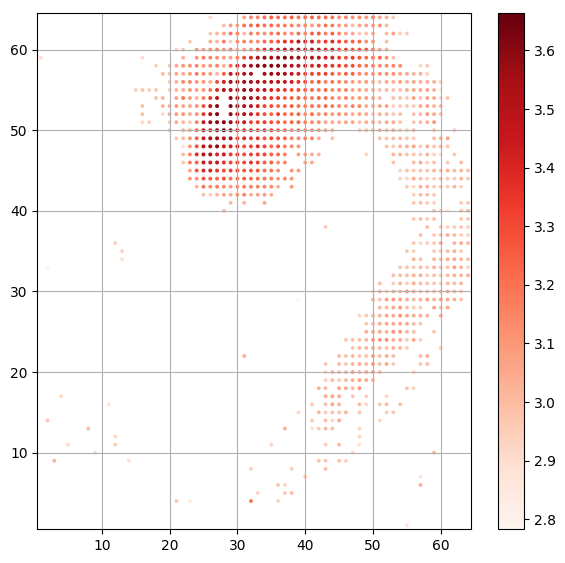

In [58]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=hetas, c=hetas, cmap="Reds")
colorbar()
grid()

In [59]:
hetacut=quantile(hetas, 0.90)
tuabueta=findall(x->x>hetacut,hetas);
auxchans=hcat(orderchans[tuabueta,:], hetas[tuabueta])
naux=size(auxchans,1)

105

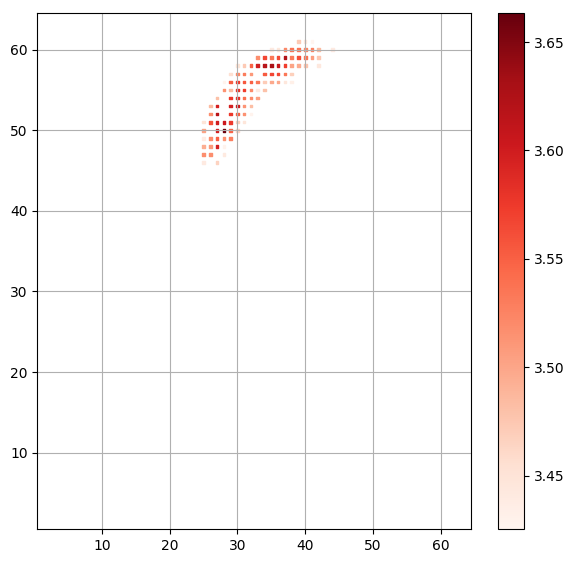

In [60]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(auxchans[:,2], auxchans[:,1], s=auxchans[:,4], 
    c=auxchans[:,4],marker="s", cmap="Reds")
colorbar()
grid()

In [61]:
imutres=zeros(nchan)
refe=[50,28]
fijo=lfp[refe[1], refe[2],:]
for j=1:nchan
    reng,col=orderchans[j,1],orderchans[j,2]
    ejemplo=lfp[reng,col,:]
    imutres[j]=infomutua(fijo, ejemplo)
end

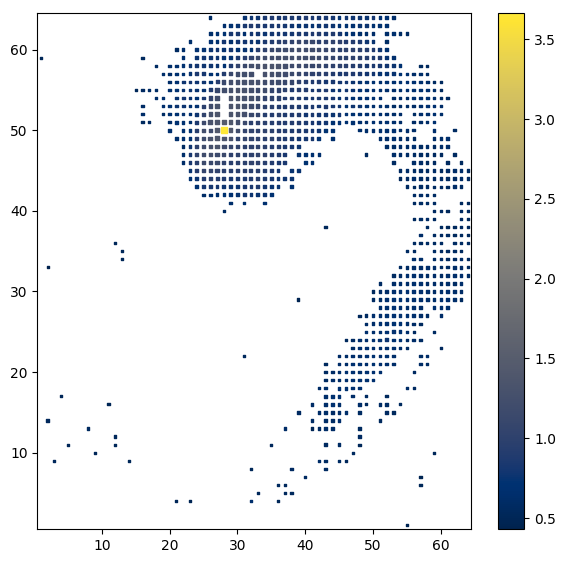

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd576239358>

In [62]:
ff=figure(figsize=(7,6.7))
xlim(0.5,64.5)
ylim(0.5,64.5)
scatter(orderchans[:,2], orderchans[:,1], s=imutres.*5, c=imutres, cmap="cividis", marker="s")
colorbar()
#grid()

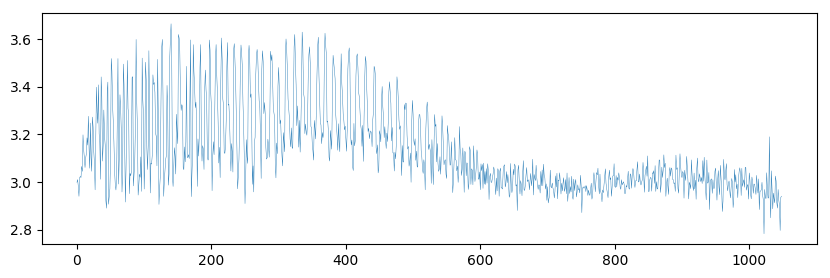

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd57631fac8>

In [63]:
figure(figsize=(10,3))
plot(hetas, lw=0.3)

In [64]:
mutinfo=zeros(naux,naux);
crossentro=zeros(naux,naux)

@time for j=1:naux
    for k=j:naux
        
        reng1,col1=(auxchans[j,1], auxchans[j,2])
        reng2,col2=(auxchans[k,1], auxchans[k,2])
        
        reng1=round(Int32, reng1)
        reng2=round(Int32, reng2)
        
        col1=round(Int32, col1)
        col2=round(Int32, col2)
        
        
        
        dat1=lfp[reng1, col1,:]
        dat2=lfp[reng2, col2,:]
        
        mutinfo[j,k]=infomutua(dat1,dat2)
        mutinfo[k,j]=mutinfo[j,k]
    
    end
end

  5.966175 seconds (277.01 k allocations: 3.476 GiB, 2.68% gc time)


In [65]:
for j=1:naux
    mutinfo[j,j]=0
end

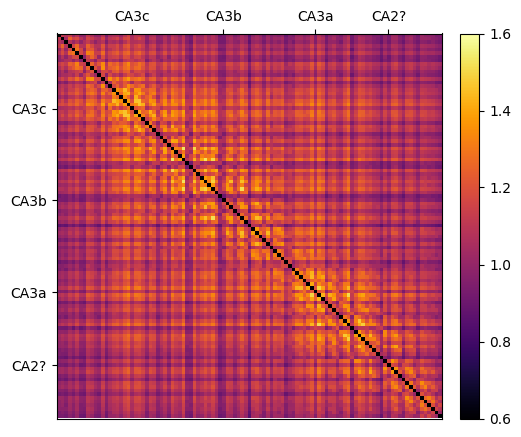

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd5789ccda0>

In [66]:
figure(figsize=(6,5))

imshow(mutinfo, cmap="inferno", interpolation="nearest", vmin=0.6, vmax=1.6)

#onde=[55, 125, 200, 250]
onde=[20, 45, 70, 90]
que=["CA3c","CA3b", "CA3a", "CA2?" ]
tick_params(bottom=false, top=true)
xticks(onde, que)
yticks(onde, que)
tick_params(bottom=false, top=true, labeltop=true, labelbottom=false)

colorbar(fraction=0.046, pad=0.04)

In [67]:
?crossentropy

search: crossentropy crossentro



```
crossentropy(p, q, [b])
```

Compute the cross entropy between `p` and `q`, optionally specifying a real number `b` such that the result is scaled by `1/log(b)`.
